In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
pd.set_option('display.max_columns', None)


In [170]:
#load the history data
df = pd.read_csv('D:/DKU大三学习/Stats 302/Final Project/Players.csv')
df = df.drop('Unnamed: 0',axis = 1)

In [171]:
#load 2022 MVP candidates data for prediction
df_2022 = pd.read_csv('D:/DKU大三学习/Stats 302/Final Project/2022.csv')


In [172]:
df_2022

,year,player,age,team,games,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,W,L,W/L,seed
0,2022,Nikola Jokic,27,DEN,57,33.1,25.8,13.8,8.0,1.4,0.8,0.571,0.363,0.811,11.7,0.299,38,26,0.594,10
1,2022,Giannis Antetokounmpo,27,MIL,54,32.8,29.2,11.6,6.0,1.0,1.4,0.544,0.296,0.722,10.6,0.288,40,25,0.615,8
2,2022,Joel Embiid,27,PHI,51,33.1,29.5,11.2,4.4,1.1,1.4,0.490,0.351,0.822,9.2,0.262,39,24,0.619,11
3,2022,Chris Paul,36,PHO,58,33.0,14.9,4.5,10.7,1.9,0.3,0.487,0.330,0.843,8.5,0.212,51,13,0.797,1
4,2022,Rudy Gobert,29,UTA,49,32.1,15.7,14.8,1.2,0.7,2.2,0.711,0.000,0.682,8.8,0.270,40,23,0.635,3
5,2022,James Harden,32,PHI,48,36.5,22.9,7.9,10.3,1.3,0.6,0.425,0.344,0.872,1.4,0.461,39,24,0.619,11
6,2022,Luka Doncic,23,DAL,48,35.6,27.8,9.2,8.8,1.2,0.5,0.450,0.332,0.739,5.1,0.143,39,25,0.609,9
7,2022,Ja Morant,22,MEM,52,33.3,27.6,5.8,6.6,1.2,0.4,0.494,0.343,0.761,6.4,0.177,44,22,0.667,6
8,2022,Stephen Curry,33,GSW,59,34.8,25.8,5.2,6.4,1.3,0.4,0.432,0.379,0.918,7.7,0.180,43,21,0.672,2
9,2022,Devin Booker,25,PHO,54,34.4,25.6,5.2,4.6,1.1,0.4,0.448,0.368,0.864,5.2,0.134,51,13,0.797,1


In [173]:
df_2022.dtypes

year           int64
player        object
age            int64
team          object
games          int64
mp_per_g     float64
pts_per_g    float64
trb_per_g    float64
ast_per_g    float64
stl_per_g    float64
blk_per_g    float64
fg_pct       float64
fg3_pct      float64
ft_pct       float64
ws           float64
ws_per_48    float64
W              int64
L              int64
W/L          float64
seed           int64
dtype: object

In [174]:
#data exploration
df.dtypes

year             int64
rank            object
player          object
age              int64
team            object
award_share    float64
games            int64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct         object
ft_pct         float64
ws             float64
ws_per_48      float64
W                int64
L                int64
W/L            float64
seed             int64
MVP             object
dtype: object

In [175]:
df['fg3_pct'] = pd.to_numeric(df['fg3_pct'],errors='coerce')

In [176]:
df.dtypes

year             int64
rank            object
player          object
age              int64
team            object
award_share    float64
games            int64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
W                int64
L                int64
W/L            float64
seed             int64
MVP             object
dtype: object

In [177]:
df.isnull().sum()

year            0
rank            0
player          0
age             0
team            0
award_share     0
games           0
mp_per_g        0
pts_per_g       0
trb_per_g       0
ast_per_g       0
stl_per_g       0
blk_per_g       0
fg_pct          0
fg3_pct        25
ft_pct          0
ws              0
ws_per_48       0
W               0
L               0
W/L             0
seed            0
MVP             0
dtype: int64

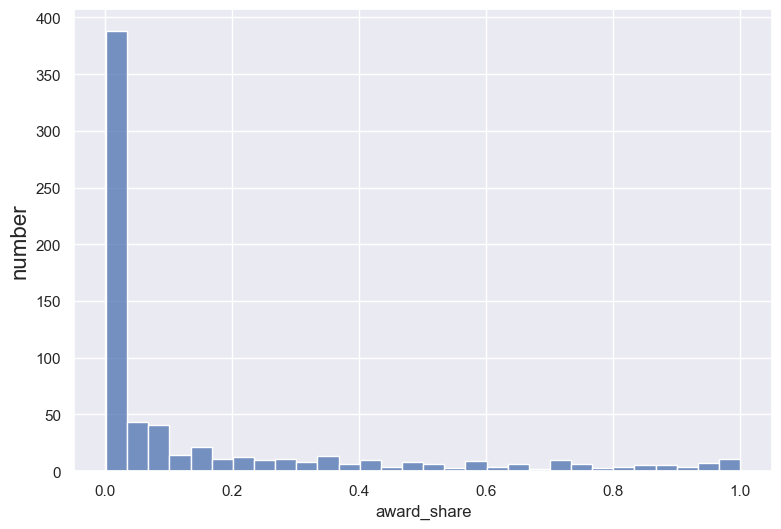

In [178]:
import seaborn as sns 
# check the distribution of individual features using seaborn
sns.set_context("talk")
sns.set(rc={'figure.figsize':(9,6)}) # set the size of the figure

sns.histplot(df['award_share'], bins=30, kde=False)
#sns.histplot(boston['PTRATIO'], bins=30, kde=False)
plt.ylabel('number', size = 16)
plt.show()

In [179]:
df_exp = df.drop(['year','rank','team','MVP','player'],axis = 1)

In [180]:
df_exp.columns

Index(['age', 'award_share', 'games', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48', 'W', 'L', 'W/L', 'seed'],
      dtype='object')

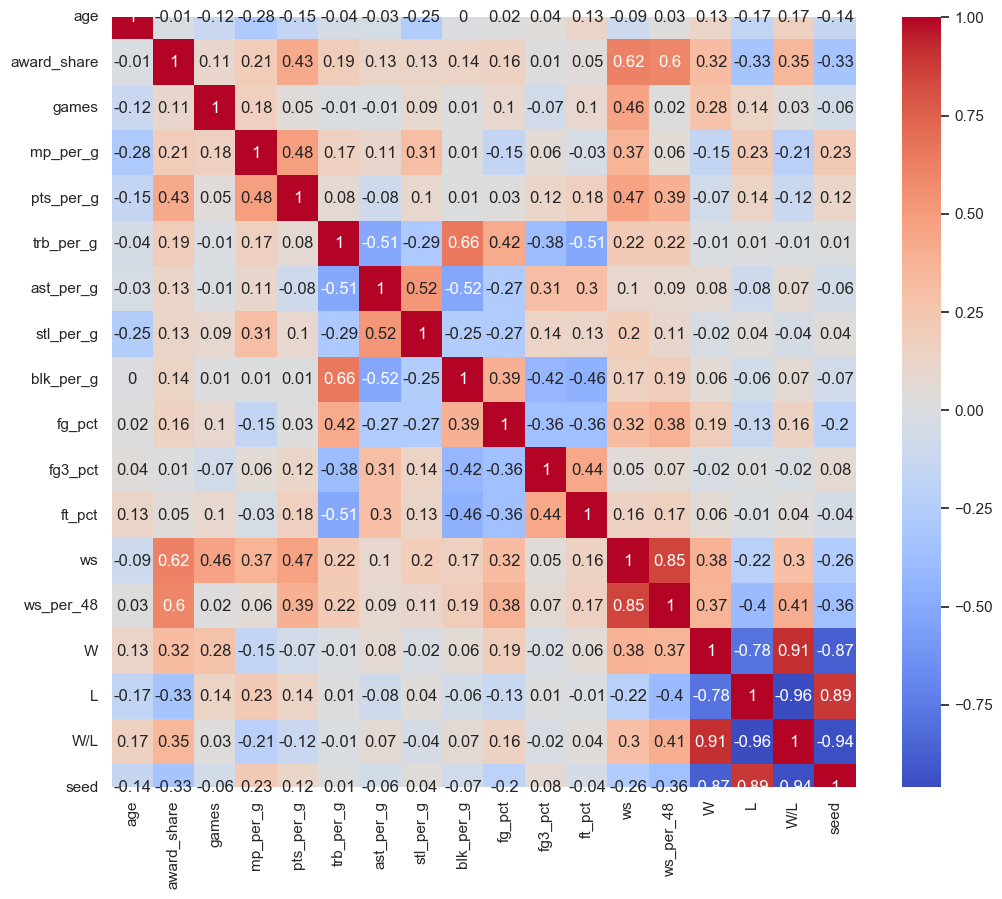

In [181]:
# compute the pair wise correlation for all columns  
correlation_matrix = df_exp.corr().round(2)

# print heatmap of the correlation matrix
# next two lines remove the duplicate upper half of matrix
#mask = np.zeros(correlation_matrix.shape, dtype=bool)
#mask[np.triu_indices(len(mask),1)] = True
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(data=correlation_matrix, annot=True, cmap = "coolwarm"); 

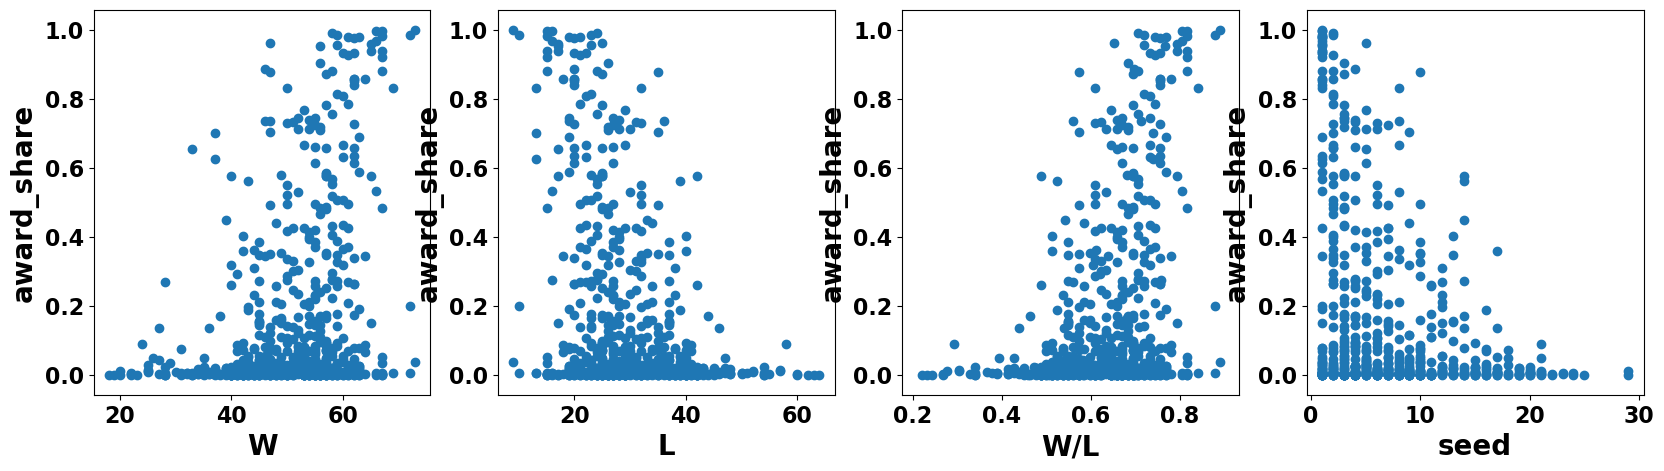

In [182]:
#plot the image of features having linear correlations larger than 0.3 with award_share
import matplotlib 
# remove changes to matplotlib made by seaborn
matplotlib.rc_file_defaults()

# the next lines improve the readability of the tick labels in plots
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(20, 5))
y = df_exp['award_share']

plt.subplot(1,4,1)
x = df_exp['W']
plt.scatter(x, y, marker='o') 
plt.xlabel('W', size=20)
plt.ylabel('award_share', size=20)

plt.subplot(1,4,2)
x = df_exp['L']
plt.scatter(x, y, marker='o') 
plt.xlabel('L', size=20)
plt.ylabel('award_share', size=20)

plt.subplot(1,4,3)
x = df_exp['W/L']
plt.scatter(x, y, marker='o') 
plt.xlabel('W/L', size=20)
plt.ylabel('award_share', size=20)

plt.subplot(1,4,4)
x = df_exp['seed']
plt.scatter(x, y, marker='o') 
plt.xlabel('seed', size=20)
plt.ylabel('award_share', size=20)

plt.show()

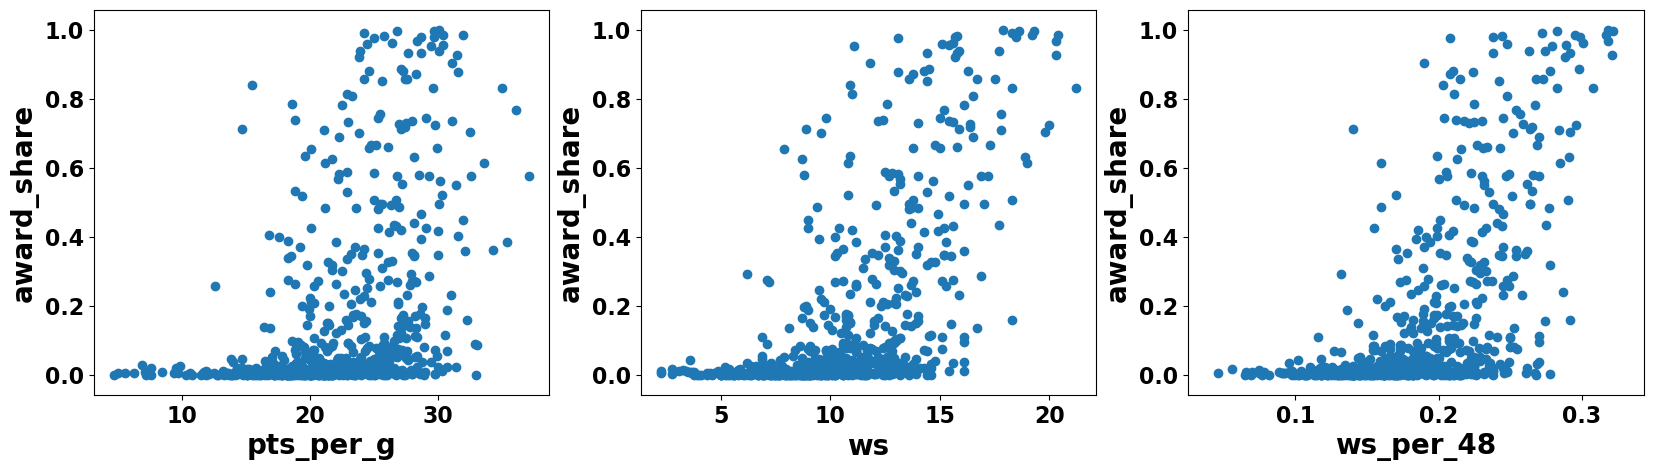

In [183]:
import matplotlib 
# remove changes to matplotlib made by seaborn
matplotlib.rc_file_defaults()

# the next lines improve the readability of the tick labels in plots
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(20, 5))
y = df_exp['award_share']

plt.subplot(1,3,1)
x = df_exp['pts_per_g']
plt.scatter(x, y, marker='o') 
plt.xlabel('pts_per_g', size=20)
plt.ylabel('award_share', size=20)

plt.subplot(1,3,2)
x = df_exp['ws']
plt.scatter(x, y, marker='o') 
plt.xlabel('ws', size=20)
plt.ylabel('award_share', size=20)

plt.subplot(1,3,3)
x = df_exp['ws_per_48']
plt.scatter(x, y, marker='o') 
plt.xlabel('ws_per_48', size=20)
plt.ylabel('award_share', size=20)

plt.show()

In [184]:
#prepare data for spliting
X = df.drop(['year','rank','team','MVP','award_share',],axis = 1)
#X = pd.DataFrame(np.c_[df['ws'],df['ws_per_48'],df['W'],df['W/L']],columns = ['ws','ws_per_48','W','W/L'])
Y = pd.DataFrame(np.c_[df['player'],df['MVP'],df['award_share']],columns = ['player','MVP','award_share'])

In [185]:
#same for 2022 candidates data
X_2022 = df_2022.drop(['year','team',],axis = 1)
X_2022.dtypes

player        object
age            int64
games          int64
mp_per_g     float64
pts_per_g    float64
trb_per_g    float64
ast_per_g    float64
stl_per_g    float64
blk_per_g    float64
fg_pct       float64
fg3_pct      float64
ft_pct       float64
ws           float64
ws_per_48    float64
W              int64
L              int64
W/L          float64
seed           int64
dtype: object

In [186]:
X.dtypes

player        object
age            int64
games          int64
mp_per_g     float64
pts_per_g    float64
trb_per_g    float64
ast_per_g    float64
stl_per_g    float64
blk_per_g    float64
fg_pct       float64
fg3_pct      float64
ft_pct       float64
ws           float64
ws_per_48    float64
W              int64
L              int64
W/L          float64
seed           int64
dtype: object

In [187]:
#check for nan value
X.isnull().sum()

player        0
age           0
games         0
mp_per_g      0
pts_per_g     0
trb_per_g     0
ast_per_g     0
stl_per_g     0
blk_per_g     0
fg_pct        0
fg3_pct      25
ft_pct        0
ws            0
ws_per_48     0
W             0
L             0
W/L           0
seed          0
dtype: int64

In [188]:
Y.isnull().sum()

player         0
MVP            0
award_share    0
dtype: int64

In [189]:
#build X and Y for regression
X_reg = X.iloc[:,1:]
Y_reg = Y.iloc[:,2]

In [190]:
X_2022_reg = X_2022.iloc[:,1:]

In [408]:
#using train_test_split function to do a 0.8/0.2 train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_reg, Y_reg, test_size = 0.25)

In [409]:
X_train.isnull().sum()

age           0
games         0
mp_per_g      0
pts_per_g     0
trb_per_g     0
ast_per_g     0
stl_per_g     0
blk_per_g     0
fg_pct        0
fg3_pct      17
ft_pct        0
ws            0
ws_per_48     0
W             0
L             0
W/L           0
seed          0
dtype: int64

In [410]:
#fill the nan value with mean
train_mean_value = X_train['fg3_pct'].mean()
X_train['fg3_pct'].fillna(value = train_mean_value, inplace = True)

C:\Users\Renyu\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [411]:
X_train.isnull().sum()

age          0
games        0
mp_per_g     0
pts_per_g    0
trb_per_g    0
ast_per_g    0
stl_per_g    0
blk_per_g    0
fg_pct       0
fg3_pct      0
ft_pct       0
ws           0
ws_per_48    0
W            0
L            0
W/L          0
seed         0
dtype: int64

In [412]:
#fill the test nan value with mean
test_mean_value = X_test['fg3_pct'].mean()
X_test['fg3_pct'].fillna(value = test_mean_value, inplace = True)

In [413]:
#standardize train and test data
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)


X_test_norm = normalizer.fit_transform(X_test)
#X_test_norm
X_train_norm.shape

(513, 17)

In [414]:
#standardize 2022 candidates data for prediction
normalizer = preprocessing.Normalizer()
X_2022_norm = normalizer.fit_transform(X_2022_reg)

In [391]:
#linear regression
# Train the model using sklearn LinearRegression with 17 features
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_norm, Y_train)

LinearRegression()

In [392]:
from sklearn.metrics import r2_score
# model evaluation for training set
Y_train_predict = lin_model.predict(X_train_norm)
r2 = r2_score(Y_train, Y_train_predict)
print('the R^2 score of the training data is {:.3f}'.format(r2))

# model evaluation for testing set
Y_test_predict = lin_model.predict(X_test_norm)
r2 = r2_score(Y_test, Y_test_predict)
print('the R^2 score of the test data is {:.3f}'.format(r2))

the R^2 score of the training data is 0.578
the R^2 score of the test data is 0.535


In [393]:
#predicion of 2022 MVP 
Y_2022_pred = lin_model.predict(X_2022_norm)
Y_2022_pred

array([ 0.39148071,  0.41969278,  0.33487396,  0.34659531, -0.04175631,
       -1.20184742,  0.37798372,  0.277062  ,  0.35470734,  0.37736782])

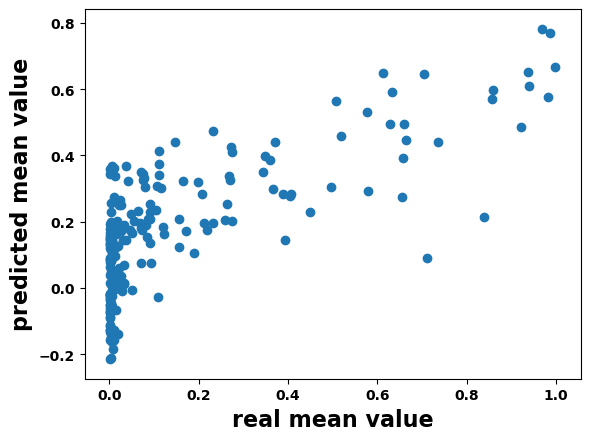

In [394]:
# plotting the y_test vs y_pred
# ideally: a straight line

# the next lines improve the readability of the tick labels in plots
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 


plt.scatter(Y_test, Y_test_predict)
plt.xlabel('real mean value', size=16)
plt.ylabel('predicted mean value', size=16)
plt.show()

In [395]:
#polynomial regression

In [396]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree)
  
# transform the features to higher degree features.
# if an input sample is two dimensional and of the form [a, b], 
# the degree 2 polynomial features are [1, a, b, a^2, ab, b^2].
X_train_poly = poly_features.fit_transform(X_train_norm)
X_test_poly  = poly_features.fit_transform(X_test_norm)
print(X_train_poly.shape)

(479, 171)


In [397]:
X_2022_poly = poly_features.fit_transform(X_2022_norm)

In [398]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  
# predicting and evaluating training data-set
Y_train_predicted = poly_model.predict(X_train_poly)
r2_train = r2_score(Y_train, Y_train_predicted) 
print('the R^2 score of the training data is {:.3f}'.format(r2_train))
    
# predicting and evaluating test data-set
y_test_predict = poly_model.predict(X_test_poly)
r2_test = r2_score(Y_test, Y_test_predict)  
print('the R^2 score of the test data is {:.3f}'.format(r2_test)) 
 

the R^2 score of the training data is 0.784
the R^2 score of the test data is 0.535


In [399]:
#prediction of 2022 MVP
poly_model.predict(X_2022_poly)

array([  0.65625  ,   0.28125  ,   0.28125  ,   0.234375 ,  -0.625    ,
       -29.3984375,   0.       ,  -0.03125  ,   0.0625   ,  -0.046875 ])

In [400]:
#use permutation and see the importance of each feature
from sklearn.inspection import permutation_importance

In [415]:
#xgboost
import xgboost

In [416]:
xgb_reg = xgboost.XGBRegressor(random_state=42, verbosity = 0)

# show all parameter values
print(xgb_reg)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [417]:
# fit the data
# the validation score is computed after adding each new tree to the ensemble
# and XGBoost automatically determines the minimum
xgb_reg.fit(X_train_norm, Y_train, eval_set=[(X_test_norm, Y_test)],early_stopping_rounds=10)

[0]	validation_0-rmse:0.31788
[1]	validation_0-rmse:0.25198
[2]	validation_0-rmse:0.21111
[3]	validation_0-rmse:0.18522
[4]	validation_0-rmse:0.17253
[5]	validation_0-rmse:0.16335
[6]	validation_0-rmse:0.15888
[7]	validation_0-rmse:0.15652
[8]	validation_0-rmse:0.15328
[9]	validation_0-rmse:0.15250
[10]	validation_0-rmse:0.15315
[11]	validation_0-rmse:0.15318
[12]	validation_0-rmse:0.15288
[13]	validation_0-rmse:0.15324
[14]	validation_0-rmse:0.15316
[15]	validation_0-rmse:0.15344
[16]	validation_0-rmse:0.15402
[17]	validation_0-rmse:0.15370
[18]	validation_0-rmse:0.15427
[19]	validation_0-rmse:0.15347


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [418]:
#predict the test set output using xgboost model
Y_test_pred = xgb_reg.predict(X_test_norm)


In [420]:
#compute the r2 score of test data
score = r2_score(Y_test,Y_test_pred)
score

0.6632644751942443

In [433]:
#prediction of 2022 MVP
Y_2022_pred = xgb_reg.predict(X_2022_norm)

In [434]:
#create a dataframe for comparison
df_2022_xgb = pd.DataFrame(np.c_[df_2022['player'],Y_2022_pred],columns = ['player','predicted MVP'])
df_2022_xgb

,player,predicted MVP
0,Nikola Jokic,0.548657
1,Giannis Antetokounmpo,0.273843
2,Joel Embiid,0.419404
3,Chris Paul,0.225254
4,Rudy Gobert,0.154619
5,James Harden,0.0795715
6,Luka Doncic,0.292048
7,Ja Morant,0.119099
8,Stephen Curry,0.108046
9,Devin Booker,0.0983088


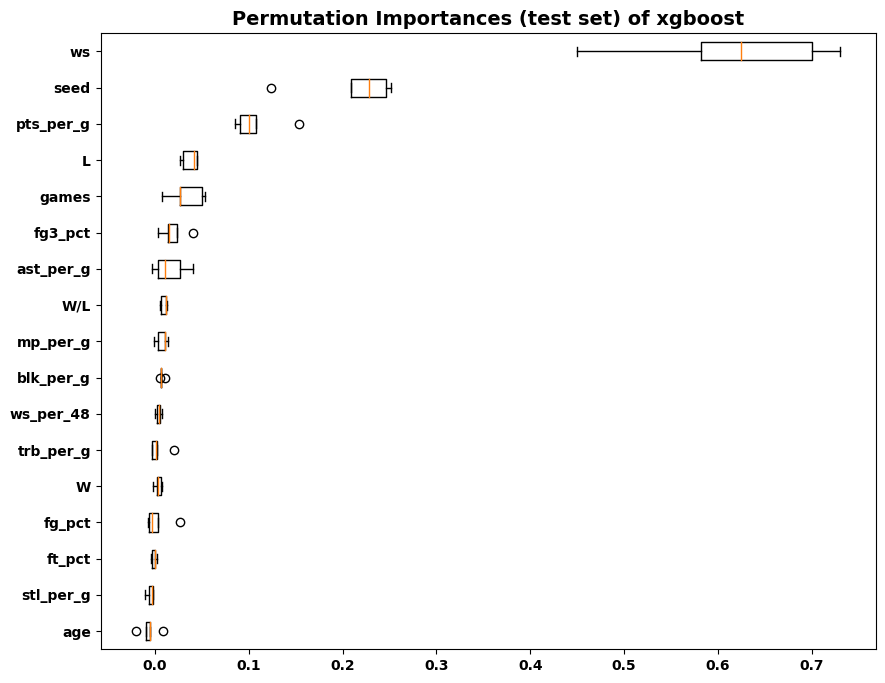

In [421]:
# compute the permutation importance
result = permutation_importance(xgb_reg, X_test_norm, Y_test,
                                random_state=42)
sorted_idx = result.importances_mean.argsort()

# plot result as boxplot
fig, ax = plt.subplots(figsize = (10,8))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set) of xgboost", size=14)

#plt.savefig('RF_permutation_importance_overfit.png')
plt.show()

In [422]:
#using the important feature from last figure of xgboost, build another xgboost model
X_xg = pd.DataFrame(np.c_[X['ws'],X['seed'],X['games'],X['pts_per_g'],X['L']],columns = ['ws','seed','games','pts_per_g','L'])

In [430]:
#prepare the 2022 candidates data for prediciton
X_2022_xg = pd.DataFrame(np.c_[df_2022['ws'],df_2022['seed'],df_2022['games'],df_2022['pts_per_g'],df_2022['L']],columns = ['ws','seed','games','pts_per_g','L'])

In [423]:
Y_xg = Y.iloc[:,2]

In [424]:
#using train_test_split function to do a 0.8/0.2 train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_xg, Y_xg, test_size = 0.2)

In [425]:
#standardize the train and test data
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)

X_test_norm = normalizer.fit_transform(X_test)
#X_test_norm
X_train_norm.shape

(548, 5)

In [431]:
#standardize the prediction data
normalizer = preprocessing.Normalizer()
X_2022_xg_norm = normalizer.fit_transform(X_2022_xg)

In [426]:
xgb_per = xgboost.XGBRegressor(random_state=42, verbosity = 0)

# show all parameter values
print(xgb_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [427]:
# fit the data
# the validation score is computed after adding each new tree to the ensemble
# and XGBoost automatically determines the minimum
xgb_per.fit(X_train_norm, Y_train, eval_set=[(X_test_norm, Y_test)],early_stopping_rounds=10)

[0]	validation_0-rmse:0.31826
[1]	validation_0-rmse:0.24904
[2]	validation_0-rmse:0.20716
[3]	validation_0-rmse:0.18608
[4]	validation_0-rmse:0.17337
[5]	validation_0-rmse:0.16583
[6]	validation_0-rmse:0.16318
[7]	validation_0-rmse:0.15975
[8]	validation_0-rmse:0.15760
[9]	validation_0-rmse:0.15688
[10]	validation_0-rmse:0.15702
[11]	validation_0-rmse:0.15750
[12]	validation_0-rmse:0.15735
[13]	validation_0-rmse:0.15810
[14]	validation_0-rmse:0.15824
[15]	validation_0-rmse:0.15841
[16]	validation_0-rmse:0.15775
[17]	validation_0-rmse:0.15848
[18]	validation_0-rmse:0.15856
[19]	validation_0-rmse:0.15898


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [428]:
#r2 score of test data using xgb_permutation model
Y_test_pred = xgb_per.predict(X_test_norm)
score_per = r2_score(Y_test,Y_test_pred)
score_per

0.6301188560654407

In [436]:
#predict the 2022 MVP winner
Y_2022_pred = xgb_per.predict(X_2022_xg_norm)

In [437]:
#create dataframe to compare
df_2022_xgb_per = pd.DataFrame(np.c_[df_2022['player'],Y_2022_pred],columns = ['player','predicted MVP'])
df_2022_xgb_per

,player,predicted MVP
0,Nikola Jokic,0.470225
1,Giannis Antetokounmpo,0.358928
2,Joel Embiid,0.0868134
3,Chris Paul,0.117409
4,Rudy Gobert,0.116779
5,James Harden,0.0758102
6,Luka Doncic,0.0694366
7,Ja Morant,0.0879612
8,Stephen Curry,0.179577
9,Devin Booker,0.123717


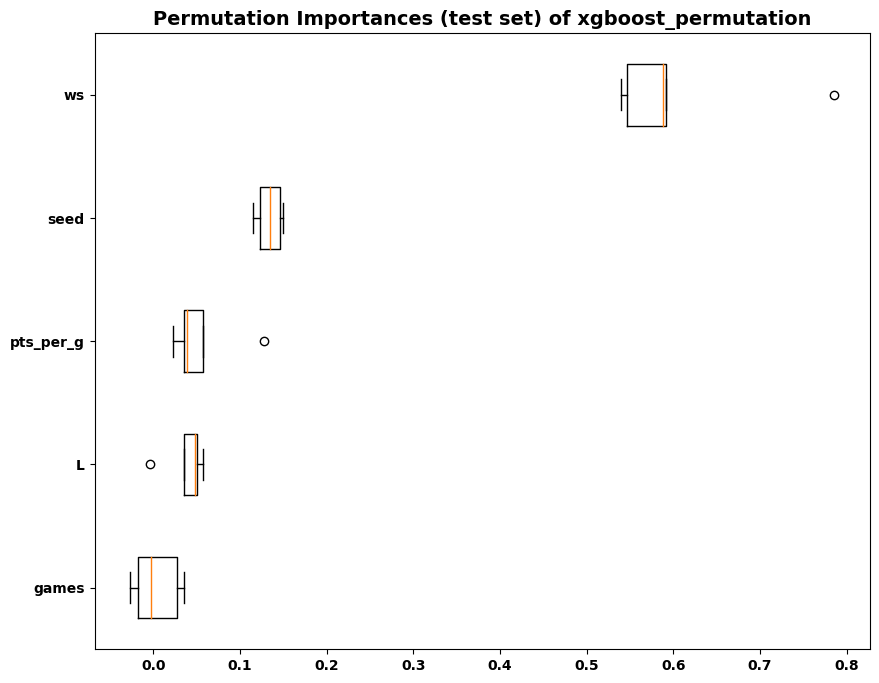

In [438]:
# compute the permutation importance
result = permutation_importance(xgb_per, X_test_norm, Y_test,
                                random_state=42)
sorted_idx = result.importances_mean.argsort()

# plot result as boxplot
fig, ax = plt.subplots(figsize = (10,8))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set) of xgboost_permutation", size=14)

#plt.savefig('RF_permutation_importance_overfit.png')
plt.show()